In [1]:
import sys
import time
import h5py
import pygrib
import numpy as np
import netCDF4 as nc
from datetime import datetime, timedelta

In [2]:
# graph tools
import cmaps
import cartopy.crs as ccrs
import cartopy.mpl.geoaxes
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
sys.path.insert(0, '/glade/u/home/ksha/NCAR/')
sys.path.insert(0, '/glade/u/home/ksha/NCAR/libs/')

from namelist import *
import data_utils as du
import graph_utils as gu

In [4]:
# Cartopy map settings
scale_param = '50m' # 10m for publication quality
# US states and CAN-US boundary
PROVINCE = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale=scale_param,
    facecolor='none')

# cmap_pct, A = gu.precip_cmap()

'/glade/scratch/ksha/MRMS'

In [12]:
with pygrib.open('/glade/scratch/ksha/MRMS/MRMS_MultiSensor_QPE_01H_Pass2_00.00_20210102-210000.grib2') as grbio:
    MRMS = grbio[1].values
    lat, lon = grbio[1].latlons()

In [13]:
MRMS = np.flipud(MRMS)
lat = np.flipud(lat)

In [15]:
cmap_pct, A = gu.precip_cmap()

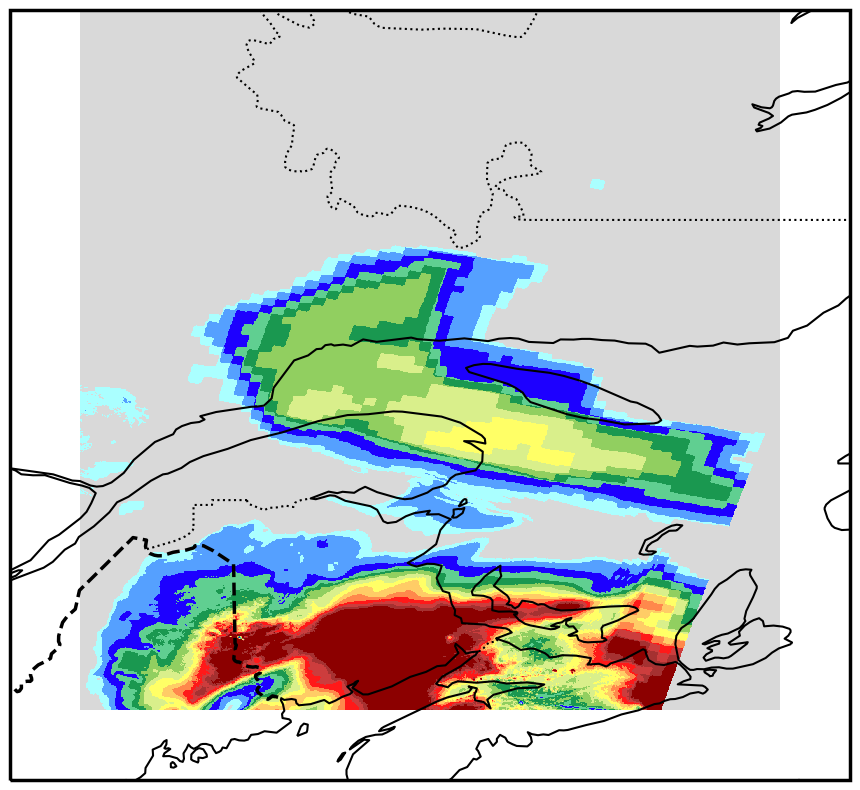

In [31]:
edge_ = [-71, -59, 44, 55]
proj_ = projection=ccrs.PlateCarree() # ccrs.NorthPolarStereo(central_longitude=-98.75)

fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(1, 1, 1, projection=proj_)

ax.set_extent(edge_, ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS.with_scale(scale_param), linestyle='--', linewidth=2.5)
ax.add_feature(PROVINCE, edgecolor='k', linestyle=':', linewidth=1.5)
ax.add_feature(cfeature.COASTLINE.with_scale(scale_param), edgecolor='k', linewidth=1.5)    
ax.spines['geo'].set_linewidth(2.5)

ax.pcolormesh(lon[2500:3500, 6000:7000], lat[2500:3500, 6000:7000], MRMS[2500:3500, 6000:7000], cmap=cmap_pct, vmin=0, vmax=3)

In [9]:
size = 400
size_h = 200

In [10]:
#3500-2000-360

In [12]:
MRMS.shape

(3500, 7000)

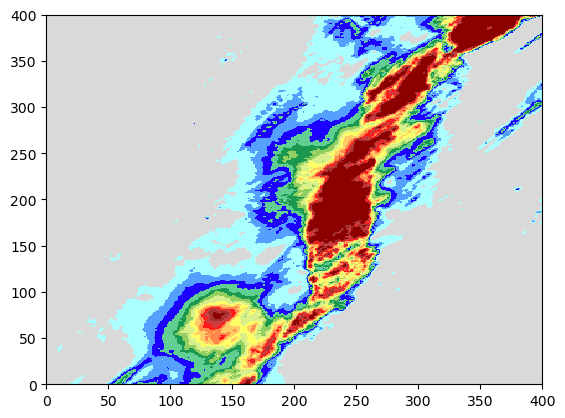

In [11]:
i = 1140
j = 4500

# plt.pcolormesh(lon[i-size_h:i+size_h, j-size_h:j+size_h]-360, 
#                lat[i-size_h:i+size_h, j-size_h:j+size_h], 
#                MRMS[i-size_h:i+size_h, j-size_h:j+size_h], cmap=cmap_pct, vmin=0, vmax=10)

plt.pcolormesh(MRMS[i-size_h:i+size_h, j-size_h:j+size_h], cmap=cmap_pct, vmin=0, vmax=10)

In [48]:
test = MRMS[i-size_h:i+size_h, j-size_h:j+size_h]

In [49]:
test_flag = test > 0.5

In [53]:
R = np.sum(test_flag)/(300*300)

In [55]:
16*25

400

In [54]:
400/25

16.0

In [56]:
400/16

25.0

In [9]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)

2023-09-27 10:42:58.677083: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-09-27 10:43:01.998889: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-09-27 10:43:02.000140: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-09-27 10:43:02.040712: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:62:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2023-09-27 10:43:02.040753: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-09-27 10:43:02.097959: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2

In [10]:
sample_circle = np.zeros([1, 200, 200, 3])



Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [ ]:
model.predict(x)

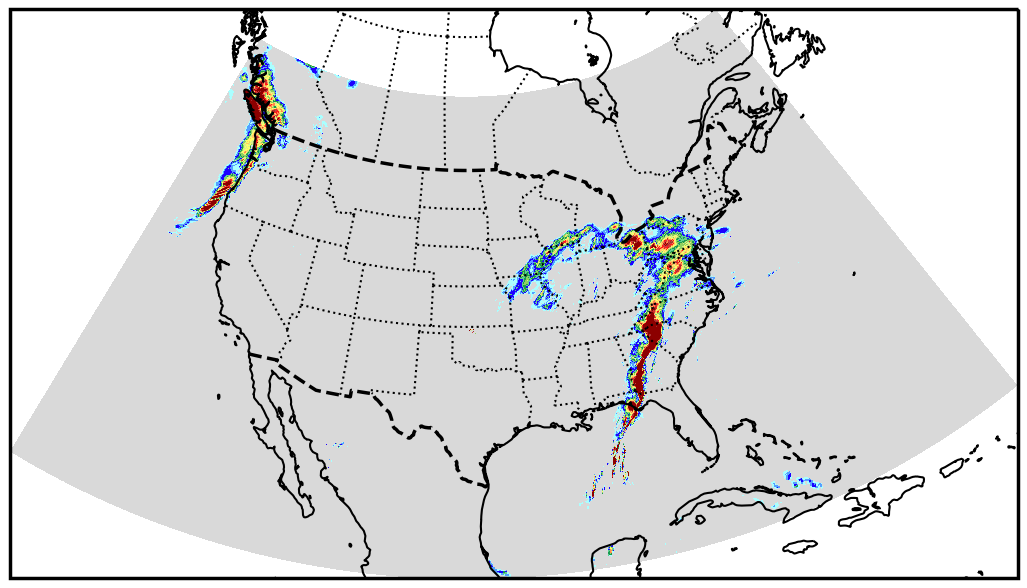

In [8]:
edge_ = [-130, -60, 20, 55]
proj_ = ccrs.NorthPolarStereo(central_longitude=-98.75) #projection=ccrs.PlateCarree() # 

fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(1, 1, 1, projection=proj_)

ax.set_extent(edge_, ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS.with_scale(scale_param), linestyle='--', linewidth=2.5)
ax.add_feature(PROVINCE, edgecolor='k', linestyle=':', linewidth=1.5)
ax.add_feature(cfeature.COASTLINE.with_scale(scale_param), edgecolor='k', linewidth=1.5)    
ax.spines['geo'].set_linewidth(2.5)

ax.pcolormesh(lon[::2, ::2]-360, lat[::2, ::2], MRMS[::2, ::2], cmap=cmap_pct, vmin=0, vmax=5, transform=ccrs.PlateCarree());

In [ ]:
0.01 deg

In [46]:
lon

array([[230.005   , 230.015   , 230.025   , ..., 299.974998, 299.984998,
        299.994998],
       [230.005   , 230.015   , 230.025   , ..., 299.974998, 299.984998,
        299.994998],
       [230.005   , 230.015   , 230.025   , ..., 299.974998, 299.984998,
        299.994998],
       ...,
       [230.005   , 230.015   , 230.025   , ..., 299.974998, 299.984998,
        299.994998],
       [230.005   , 230.015   , 230.025   , ..., 299.974998, 299.984998,
        299.994998],
       [230.005   , 230.015   , 230.025   , ..., 299.974998, 299.984998,
        299.994998]])

In [27]:
lon[::100, ::100]-360

array([[-129.995     , -128.99500003, -127.99500006, ...,  -62.99500191,
         -61.99500194,  -60.99500197],
       [-129.995     , -128.99500003, -127.99500006, ...,  -62.99500191,
         -61.99500194,  -60.99500197],
       [-129.995     , -128.99500003, -127.99500006, ...,  -62.99500191,
         -61.99500194,  -60.99500197],
       ...,
       [-129.995     , -128.99500003, -127.99500006, ...,  -62.99500191,
         -61.99500194,  -60.99500197],
       [-129.995     , -128.99500003, -127.99500006, ...,  -62.99500191,
         -61.99500194,  -60.99500197],
       [-129.995     , -128.99500003, -127.99500006, ...,  -62.99500191,
         -61.99500194,  -60.99500197]])

In [29]:
lat[::100, ::100]

array([[54.995, 54.995, 54.995, ..., 54.995, 54.995, 54.995],
       [53.995, 53.995, 53.995, ..., 53.995, 53.995, 53.995],
       [52.995, 52.995, 52.995, ..., 52.995, 52.995, 52.995],
       ...,
       [22.995, 22.995, 22.995, ..., 22.995, 22.995, 22.995],
       [21.995, 21.995, 21.995, ..., 21.995, 21.995, 21.995],
       [20.995, 20.995, 20.995, ..., 20.995, 20.995, 20.995]])